# Data preparation

In [1]:
!curl -L -o dataset.zip "https://www.kaggle.com/api/v1/datasets/download/emirhanai/2024-u-s-election-sentiment-on-x"
!unzip dataset.zip -d ./dataset


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 14815  100 14815    0     0  21537      0 --:--:-- --:--:-- --:--:-- 66138
Archive:  dataset.zip
replace ./dataset/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./dataset/test.csv      
replace ./dataset/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./dataset/train.csv     
replace ./dataset/val.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./dataset/val.csv       


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.tokenize import TweetTokenizer
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from wordcloud import WordCloud

In [4]:
df_train = pd.read_csv('dataset/train.csv')
df_val = pd.read_csv('dataset/val.csv')
df_test = pd.read_csv('dataset/test.csv')

In [5]:
print(df_train.shape)
df_train.head()

(500, 9)


,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive


In [6]:
print(df_val.shape)
df_val.head()

(50, 9)


,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,551,@user1077,2025-02-21 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,85,320,positive
1,552,@politicsNew3,2025-02-21 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,100,450,positive
2,553,@greenVisionary3,2025-02-21 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,60,200,positive
3,554,@indieWatcher3,2025-02-21 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,30,120,neutral
4,555,@libertyFan5,2025-02-21 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,50,160,positive


In [7]:
print(df_test.shape)
df_test.head()

(50, 9)


,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,501,@user1068,2025-02-11 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,85,320,positive
1,502,@politicsNew2,2025-02-11 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,100,450,positive
2,503,@greenVisionary2,2025-02-11 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,60,200,positive
3,504,@indieWatcher2,2025-02-11 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,30,120,neutral
4,505,@libertyFan4,2025-02-11 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,50,160,positive


In [8]:
print('Train Dataset Info:')
df_train.info()

print('\nValidation Dataset Info:')
df_val.info()

print('\nTest Dataset Info:')
df_test.info()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     500 non-null    int64 
 1   user_handle  500 non-null    object
 2   timestamp    500 non-null    object
 3   tweet_text   500 non-null    object
 4   candidate    500 non-null    object
 5   party        500 non-null    object
 6   retweets     500 non-null    int64 
 7   likes        500 non-null    int64 
 8   sentiment    500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB

Validation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     50 non-null     int64 
 1   user_handle  50 non-null     object
 2   timestamp    50 non-null     object
 3   tweet_text   50 non-null     object


In [9]:
print('Missing Values in Train:\n', df_train.isnull().sum())
print('\nMissing Values in Test:\n', df_val.isnull().sum())
print('\nMissing Values in Validation:\n', df_test.isnull().sum())

Missing Values in Train:
 tweet_id       0
user_handle    0
timestamp      0
tweet_text     0
candidate      0
party          0
retweets       0
likes          0
sentiment      0
dtype: int64

Missing Values in Test:
 tweet_id       0
user_handle    0
timestamp      0
tweet_text     0
candidate      0
party          0
retweets       0
likes          0
sentiment      0
dtype: int64

Missing Values in Validation:
 tweet_id       0
user_handle    0
timestamp      0
tweet_text     0
candidate      0
party          0
retweets       0
likes          0
sentiment      0
dtype: int64


In [10]:
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_val['timestamp'] = pd.to_datetime(df_val['timestamp'])
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'])

In [11]:
df_train['sentiment'].value_counts()

,count
sentiment,
positive,328
neutral,126
negative,45
positive,1


In [12]:
df_train[df_train['sentiment']=='positive  ']

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
99,100,@libertyValues,2024-11-22 12:30:20,Chase Oliver's commitment to liberty resonates...,Chase Oliver,Libertarian Party,50,175,positive


In [13]:
df_train['sentiment'] = df_train['sentiment'].replace('positive  ', 'positive')

# Descriptive analysis

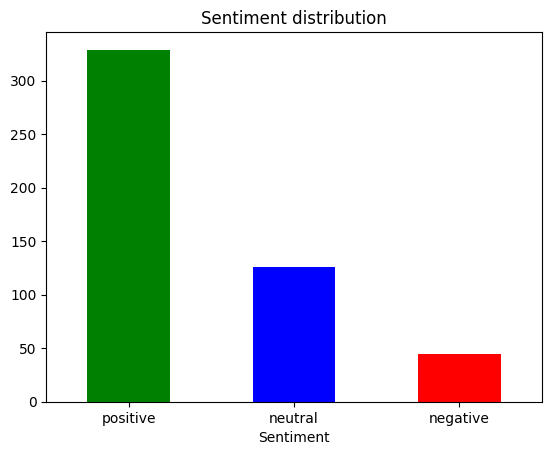

In [14]:
df_train['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment distribution')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

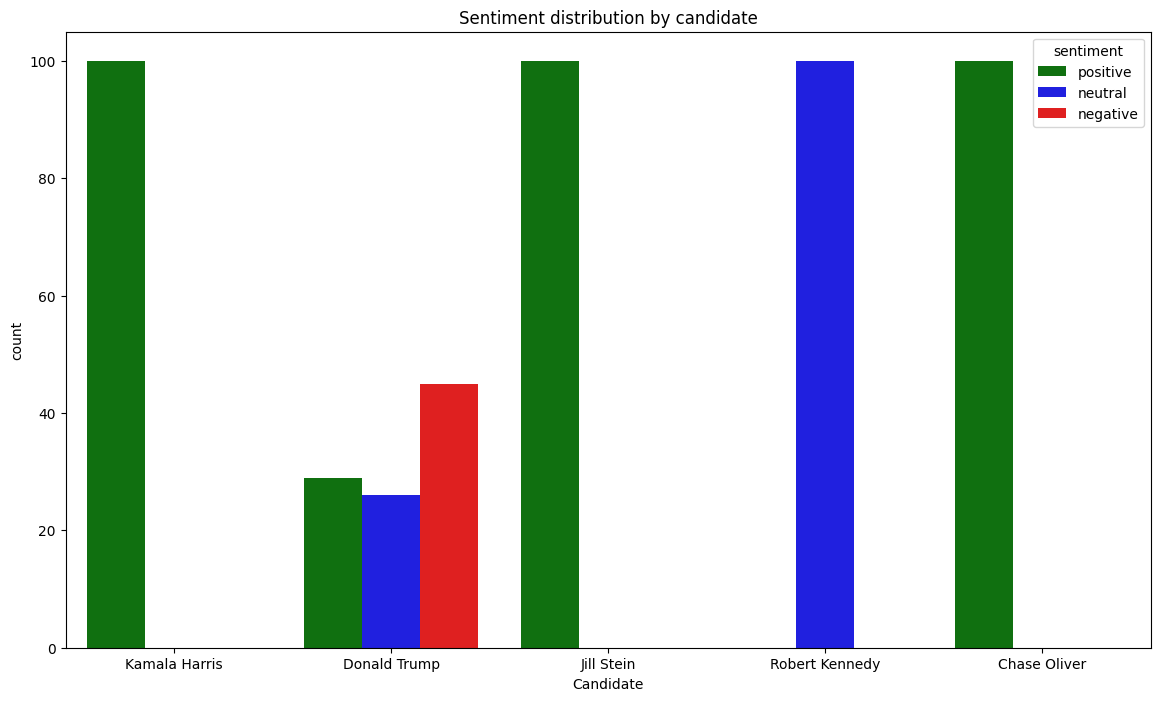

In [15]:
plt.figure(figsize=(14, 8))
palette = {'positive': 'green', 'neutral': 'blue', 'negative': 'red'}
sns.countplot(data=df_train, x='candidate', hue='sentiment', palette=palette, hue_order=['positive', 'neutral', 'negative'])
plt.title('Sentiment distribution by candidate')
plt.xlabel('Candidate')
plt.xticks(rotation=0)
plt.show()

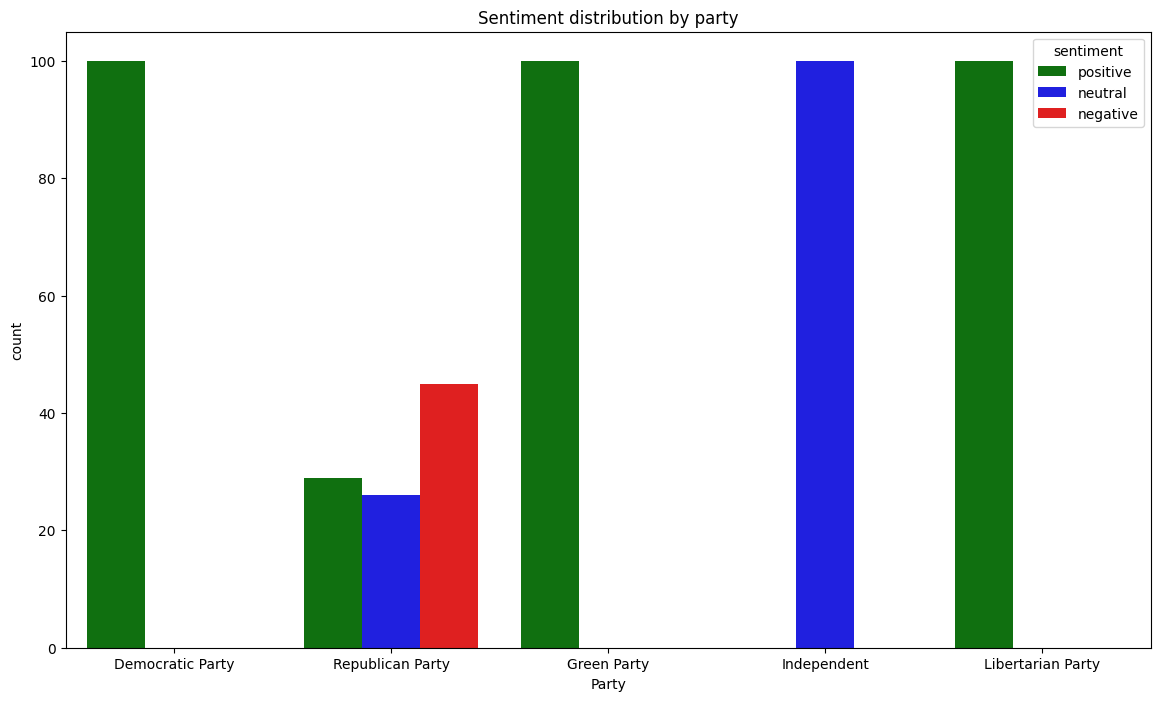

In [16]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_train, x='party', hue='sentiment', palette=palette, hue_order=['positive', 'neutral', 'negative'])
plt.title('Sentiment distribution by party')
plt.xlabel('Party')
plt.xticks(rotation=0)
plt.show()

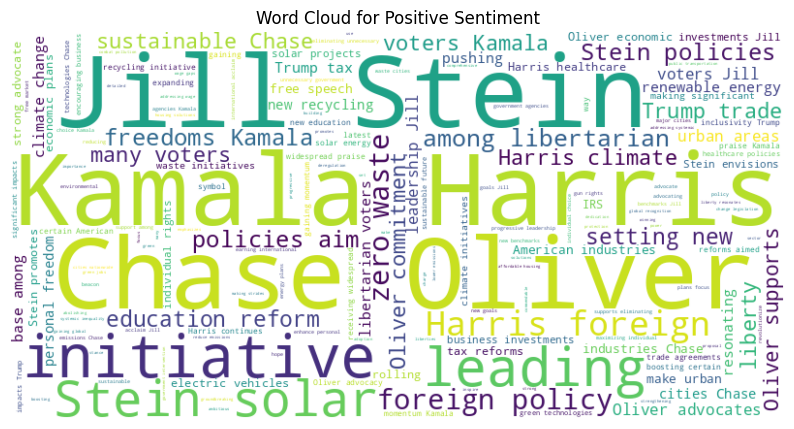

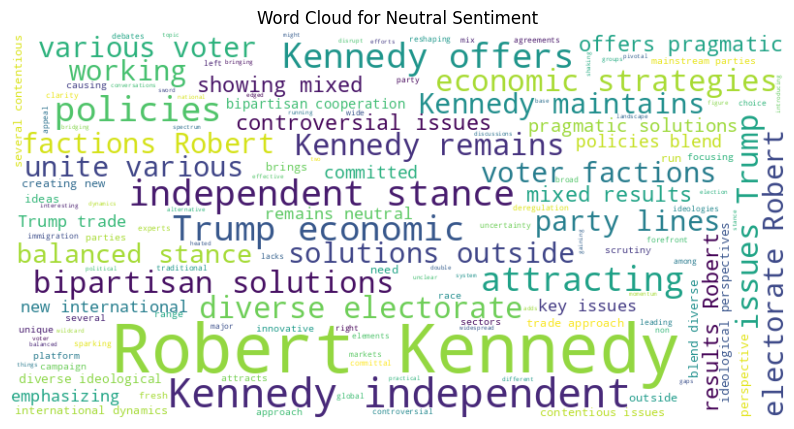

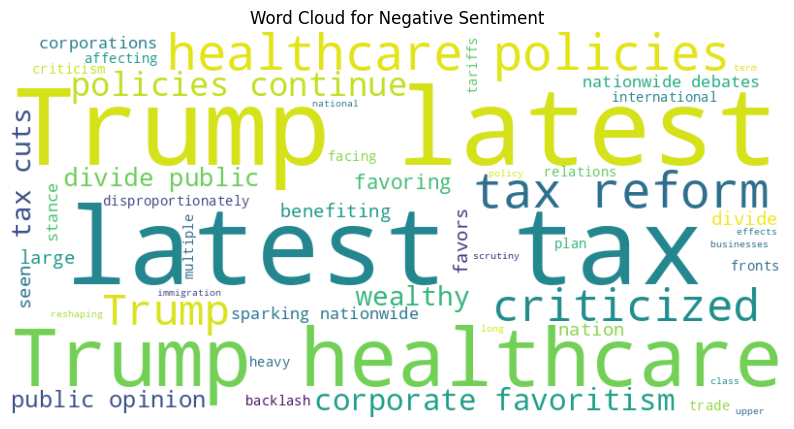

In [17]:
def generate_wordcloud_by_sentiment(df, sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['tweet_text'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()

for sentiment in ['positive', 'neutral', 'negative']:
    generate_wordcloud_by_sentiment(df_train, sentiment)

# Text preprocessing

In [18]:
def preprocess_and_tokenize(df, text_column='tweet_text'):
    tokenizer = TweetTokenizer()
    df[text_column] = df[text_column].apply(lambda text: re.sub(r'http\S+|www\S+|https\S+', '',
                                                                re.sub(r'&\w+;', '',
                                                                     text.lower())))
    df[text_column] = df[text_column].apply(lambda text: ' '.join(tokenizer.tokenize(text)))
    return df

df_train = preprocess_and_tokenize(df_train)
df_val = preprocess_and_tokenize(df_val)
df_test = preprocess_and_tokenize(df_test)

print(df_train['tweet_text'].head())

0    excited to see kamala harris leading the democ...
1    donald trump's policies are the best for our e...
2    jill stein's environmental plans are exactly w...
3    robert kennedy offers a fresh perspective outs...
4    chase oliver's libertarian stance promotes tru...
Name: tweet_text, dtype: object


Bag-of-words calculation

In [19]:
df = pd.concat([df_train.reset_index(), df_val.reset_index(), df_test.reset_index()], ignore_index=True)

In [20]:
words = Counter()
for twit in df['tweet_text']:
    for word in twit.split():
        words[word]+=1

word_to_index = {word: idx for idx, word in enumerate(words)}

In [21]:
def text_to_bow(text):
    text = text.split()
    bow = np.zeros(len(words))

    for word in text:
        if word in word_to_index:
            index = word_to_index[word]
            bow[index] += 1
    return bow

In [22]:
df_train['bow'] = df_train['tweet_text'].apply(text_to_bow)
df_val['bow'] = df_val['tweet_text'].apply(text_to_bow)
df_test['bow'] = df_test['tweet_text'].apply(text_to_bow)

In [23]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(df_train['sentiment'])
y_val = label_encoder.fit_transform(df_val['sentiment'])
y_test = label_encoder.fit_transform(df_test['sentiment'])

# Sentiment prediction

Naive Bayes on bag-of-words

In [24]:
nb = MultinomialNB()
nb.fit(np.array(df_train['bow'].tolist()), y_train)

MultinomialNB()

In [25]:
y_val_pred = nb.predict(np.array(df_val['bow'].tolist()))
y_test_pred = nb.predict(np.array(df_test['bow'].tolist()))

print("Accuracy on validation:", accuracy_score(y_val, y_val_pred))
print("Accuracy on test:", accuracy_score(y_test, y_test_pred))

Accuracy on validation: 0.94
Accuracy on test: 0.94


In [26]:
cm_val = confusion_matrix(y_val, y_val_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

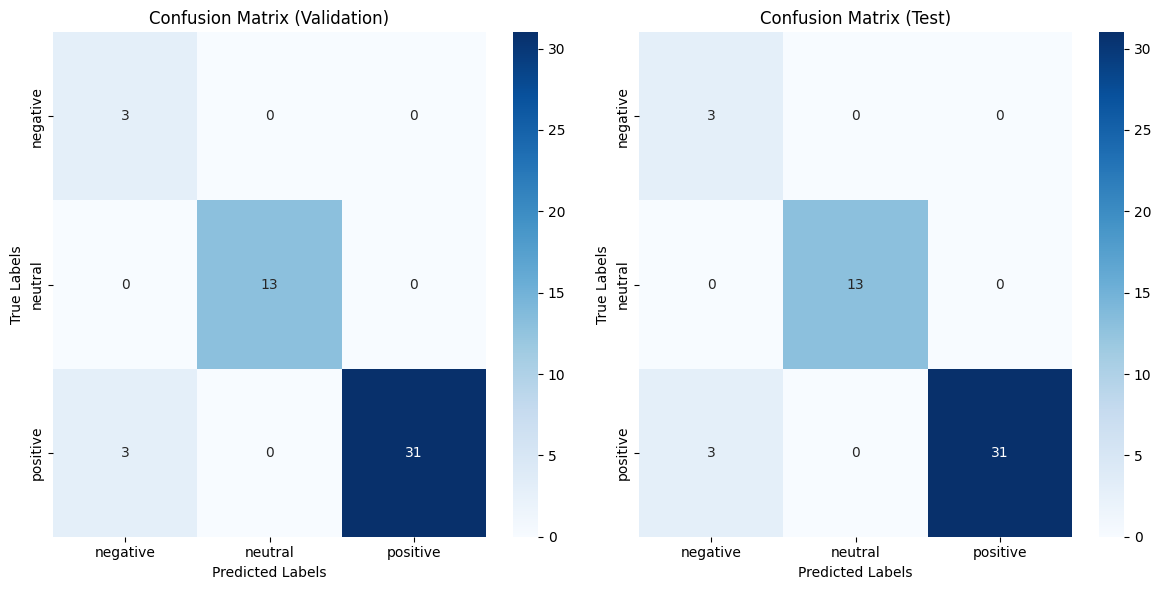

In [27]:
labels = label_encoder.classes_

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Validation)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

TF-IDF calculation

In [28]:
def compute_tf(text):
    words = text.split()
    word_count = Counter(words)
    total_words = len(words)
    tf = {word: count / total_words for word, count in word_count.items()}
    return tf

train_tf = df_train['tweet_text'].apply(compute_tf)
val_tf = df_val['tweet_text'].apply(compute_tf)
test_tf = df_test['tweet_text'].apply(compute_tf)

In [29]:
def compute_idf(corpus):
    num_docs = len(corpus)
    idf = {}
    all_words = set(word for doc in corpus for word in doc.split())
    for word in all_words:
        num_docs_with_word = sum(1 for doc in corpus if word in doc)
        idf[word] = np.log(num_docs / (1 + num_docs_with_word))
    return idf

corpus_train = df_train['tweet_text']
corpus_val = df_val['tweet_text']
corpus_test = df_test['tweet_text']
corpus = pd.concat([corpus_train, corpus_val, corpus_test], ignore_index=True)

idf = compute_idf(corpus)

In [30]:
def compute_tfidf(tf, idf):
    tfidf = {word: tf_val * idf.get(word, 0) for word, tf_val in tf.items()}
    return tfidf

train_tfidf_vocab = train_tf.apply(lambda x: compute_tfidf(x, idf))
val_tfidf_vocab = val_tf.apply(lambda x: compute_tfidf(x, idf))
test_tfidf_vocab = test_tf.apply(lambda x: compute_tfidf(x, idf))

In [31]:
def tfidf_to_vector(tfidf_dict, word_to_index):
    vector = np.zeros(len(word_to_index))
    for word, tfidf_value in tfidf_dict.items():
        if word in word_to_index:
            vector[word_to_index[word]] = tfidf_value
    return vector

df_train['tfidf'] = train_tfidf_vocab.apply(lambda x: tfidf_to_vector(x, word_to_index))
df_val['tfidf'] = val_tfidf_vocab.apply(lambda x: tfidf_to_vector(x, word_to_index))
df_test['tfidf'] = test_tfidf_vocab.apply(lambda x: tfidf_to_vector(x, word_to_index))

Naive Bayes on TF-IDF

In [32]:
nb.fit(np.array(df_train['tfidf'].to_list()), y_train)

MultinomialNB()

In [33]:
y_val_pred = nb.predict(np.array(df_val['tfidf'].to_list()))
y_test_pred = nb.predict(np.array(df_test['tfidf'].to_list()))

print("Accuracy on validation:", accuracy_score(y_val, y_val_pred))
print("Accuracy on test:", accuracy_score(y_test, y_test_pred))

Accuracy on validation: 0.98
Accuracy on test: 0.98


In [34]:
cm_val = confusion_matrix(y_val, y_val_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

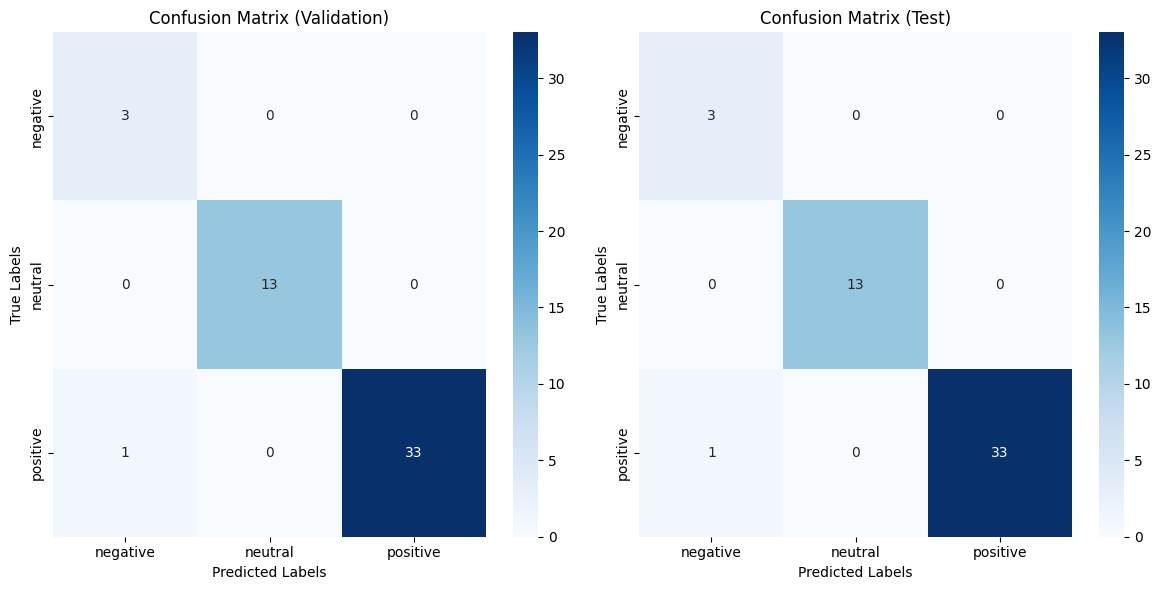

In [35]:
labels = label_encoder.classes_

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Validation)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

Logistic Regression on TF-IDF

In [36]:
lr = LogisticRegression(max_iter=1000)
lr.fit(np.array(df_train['tfidf'].to_list()), y_train)

LogisticRegression(max_iter=1000)

In [37]:
y_val_pred = lr.predict(np.array(df_val['tfidf'].to_list()))
y_test_pred = lr.predict(np.array(df_test['tfidf'].to_list()))

print("Accuracy on validation:", accuracy_score(y_val, y_val_pred))
print("Accuracy on test:", accuracy_score(y_test, y_test_pred))

Accuracy on validation: 1.0
Accuracy on test: 1.0


In [38]:
cm_val = confusion_matrix(y_val, y_val_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

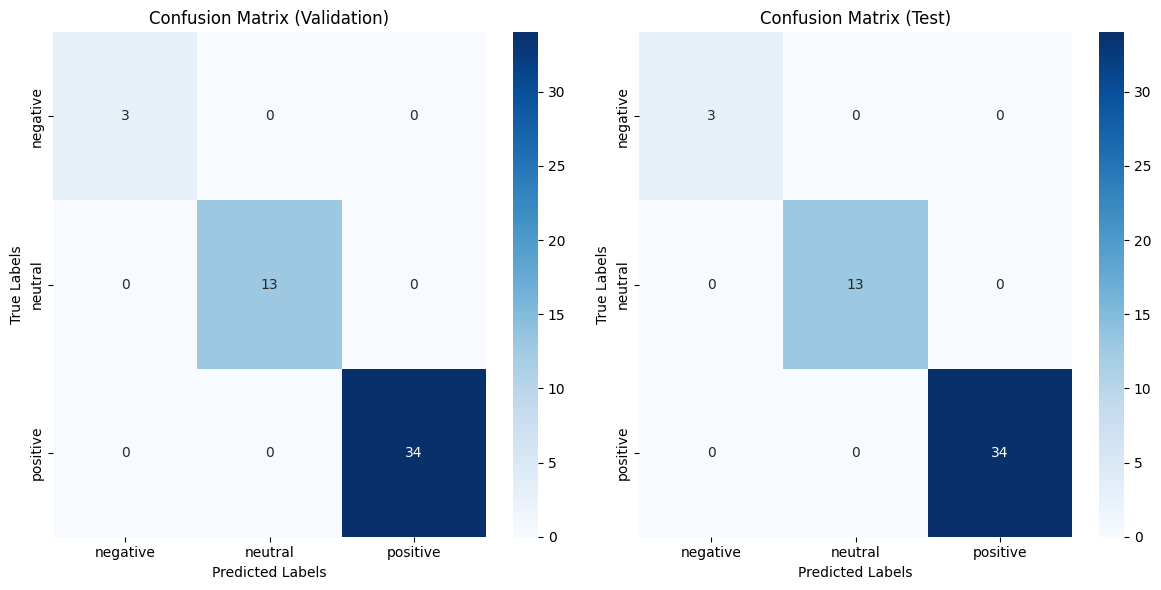

In [39]:
labels = label_encoder.classes_

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Validation)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()